In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
df=pd.read_csv("promotion_800.csv")
df

,Age,Experience_Years,Education_Level,Department,Working_Hours,Performance_Score,Promotion_Status
0,56,13,PhD,HR,49,2.86,0
1,46,6,HighSchool,Finance,57,2.37,0
2,32,2,PhD,Finance,30,9.10,0
3,25,22,Master,Marketing,55,7.39,1
4,38,17,Bachelor,IT,36,9.44,0
...,...,...,...,...,...,...,...
795,40,16,HighSchool,Sales,30,4.75,0
796,31,19,Bachelor,Sales,52,2.51,0
797,41,35,Master,HR,54,5.27,0
798,19,8,HighSchool,HR,53,1.50,0


In [36]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i])

df

,Age,Experience_Years,Education_Level,Department,Working_Hours,Performance_Score,Promotion_Status
0,56,13,3,1,49,2.86,0
1,46,6,1,0,57,2.37,0
2,32,2,3,0,30,9.10,0
3,25,22,2,3,55,7.39,1
4,38,17,0,2,36,9.44,0
...,...,...,...,...,...,...,...
795,40,16,1,4,30,4.75,0
796,31,19,0,4,52,2.51,0
797,41,35,2,1,54,5.27,0
798,19,8,1,1,53,1.50,0


In [37]:
x=df.drop("Promotion_Status",axis=1)
y=df["Promotion_Status"]
y

0      0
1      0
2      0
3      1
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Promotion_Status, Length: 800, dtype: int64

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,Age,Experience_Years,Education_Level,Department,Working_Hours,Performance_Score
264,42,24,2,4,45,3.78
615,29,8,2,2,55,4.90
329,41,27,1,2,50,6.68
342,56,30,1,3,34,6.77
394,40,36,1,0,46,1.27
...,...,...,...,...,...,...
71,38,25,2,2,33,9.27
106,41,10,2,4,57,4.62
270,19,21,0,4,46,3.04
435,51,34,0,3,37,5.50


In [39]:
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [40]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1])

In [41]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy_score:{accuracy*100:.2f}%")

accuracy_score:100.00%


In [42]:
v=model.feature_importances_
v

array([0.0343395 , 0.1700691 , 0.31534352, 0.01903522, 0.03254331,
       0.42866934])

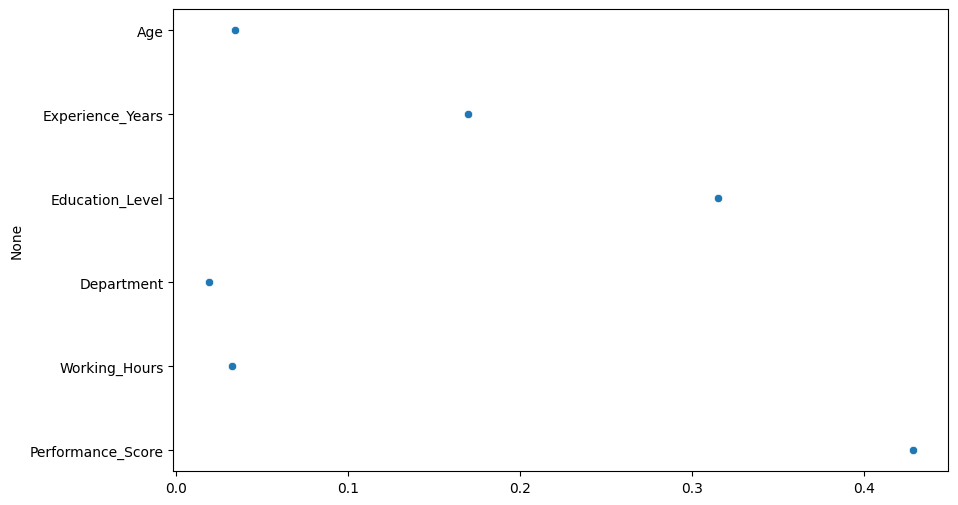

In [ ]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=model.feature_importances_,y=x.columns)
plt.show() 

In [ ]:
next=pd.DataFrame({
    "Age":["58"],
    "Experience_Years":["13"],
    "Education_Level":["PHD"],  
    "Department":["HR"],
    "Working_Hours":["49.5"],
    "Performance_Score":["2.26"],


})
for i in next.select_dtypes(include=['object']).columns:
    next[i]=label.fit_transform(next[i])

predict=model.predict(next)
predict

array([0])